<a href="https://colab.research.google.com/github/vamshi-namsani/PROJECTS-GOCOMET/blob/main/Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

HOG


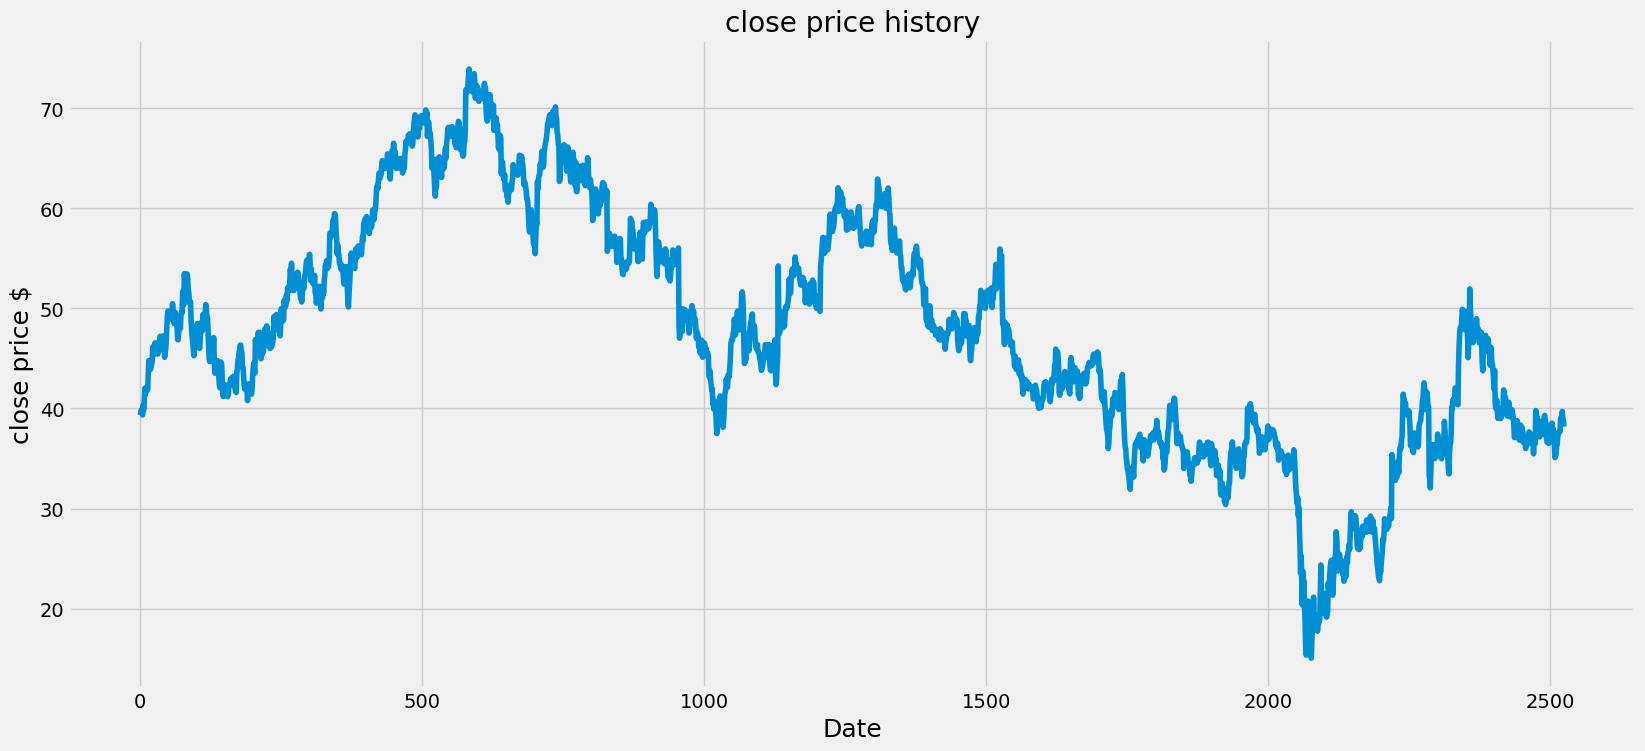

[array([0.41239391, 0.41799659, 0.4219015 , 0.41663839, 0.4127334 ,
       0.42937184, 0.4219015 , 0.43650253, 0.45823426, 0.44787771,
       0.45585735, 0.45857382, 0.45704581, 0.45551779, 0.48013581,
       0.50509338, 0.50101864, 0.49745329, 0.49015278, 0.49490659,
       0.49915107, 0.50288623, 0.52750424, 0.51409166, 0.52410864,
       0.53174873, 0.53514431, 0.52716467, 0.5336163 , 0.53412562,
       0.51918502, 0.516129  , 0.52648553, 0.52173173, 0.53921898,
       0.54634974, 0.54329372, 0.54380304, 0.53887942, 0.53548389,
       0.54702881, 0.54023769, 0.53378606, 0.51069606, 0.51884545,
       0.52512733, 0.54057725, 0.5614601 , 0.58268251, 0.58947363,
       0.58217319, 0.58319181, 0.5850594 , 0.58370113, 0.58811543,
       0.57504243, 0.57758913, 0.60169777, 0.58998302, 0.57657044])]
[0.5677419162057074]
16/16 [==============================] - 1s 15ms/step


<ipython-input-1-1f0fc4270e31>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


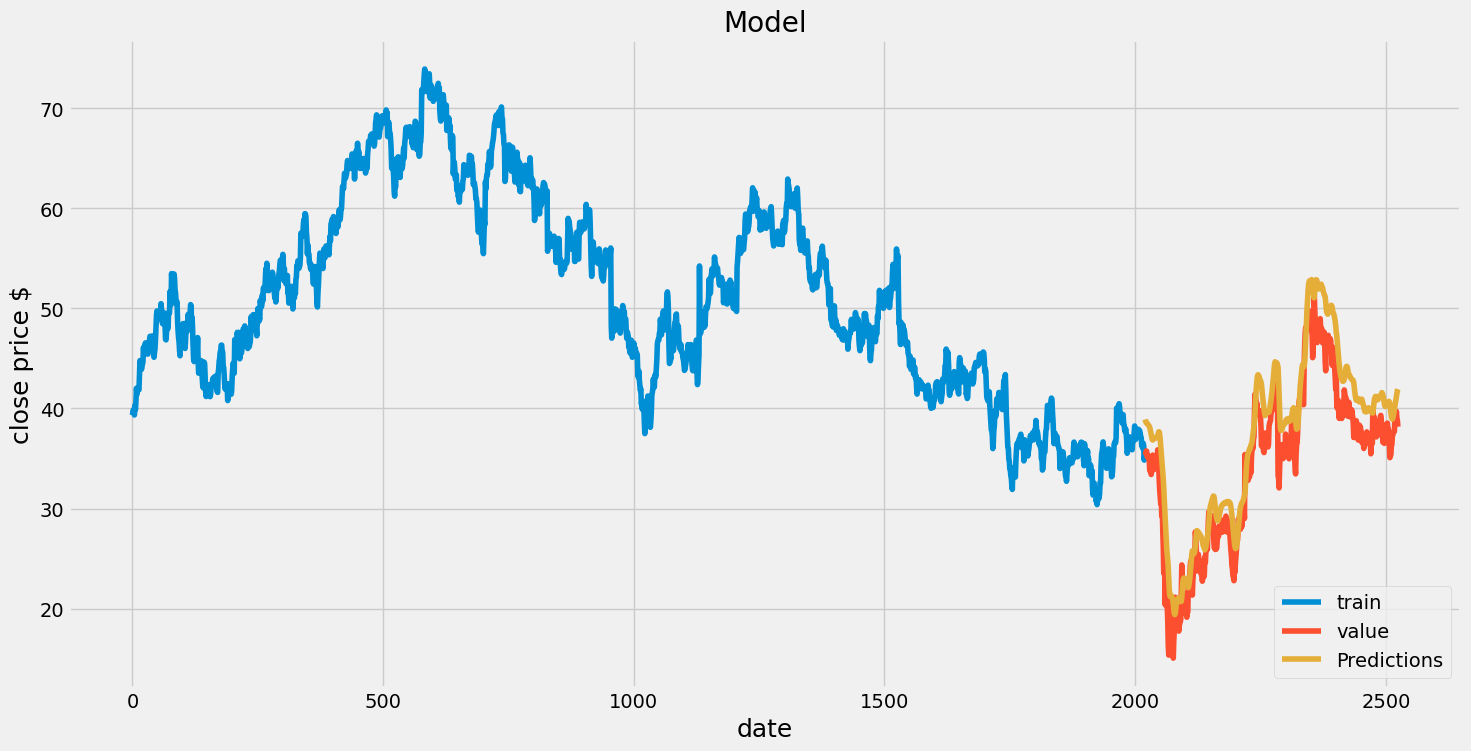

16/16 [==============================] - 0s 14ms/step
[41.93167]


In [ ]:
import  math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import time
import datetime
import pandas as pd

ticker = input("")
period1 = int(time.mktime(datetime.datetime(2012, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 12, 23, 59).timetuple()))
interval = '1d' # 1d, 1m
x=ticker

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('STOCK.csv')
df


df.shape

plt.figure(figsize=(18,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price $',fontsize=18)
plt.show()

data =  df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
   print (x_train)
   print (y_train)


x_train,y_train =np.array(x_train),np.array(y_train)


x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')


model.fit(x_train,y_train,batch_size=1 , epochs=1)

test_data = scaled_data[training_data_len - 60: , :]
x_test =[]
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])


x_test =np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse =np.sqrt( np.mean(predictions-y_test)**2)
rmse

train =data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['train','value','Predictions'],loc='lower right')
plt.show()


valid

#Get the quote
import time
import datetime
import pandas as pd

ticker = x
period1 = int(time.mktime(datetime.datetime(2021, 11, 14, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 12, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

qu_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

apple_quote = pd.read_csv(qu_string)


#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60: ].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days

X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(x_test)
#Reshape the data
X_test = np.reshape (X_test, (X_test.shape[0], X_test. shape[1], 1))
#Get the predicted scaled price
guess_price = model.predict(X_test)
#undo the scaling
guess_price = scaler.inverse_transform(guess_price)
print(guess_price[-1])




# New Section